In [1]:
from rastervision.core.data import ClassConfig
from rastervision.pytorch_learner import ClassificationImageDataset
from rastervision.pytorch_learner import ClassificationImageDataConfig
from rastervision.pytorch_learner import SolverConfig, ClassificationModelConfig
from rastervision.pytorch_learner import ClassificationLearnerConfig
from rastervision.pytorch_learner import ClassificationLearner
from rastervision.pytorch_learner import PlotOptions

import albumentations as A

In [2]:
class_config = ClassConfig(
    names=[
        'AnnualCrop',
        'HerbaceousVegetation',
        'Industrial',
        'PermanentCrop',
        'River',
        'Forest',
        'Highway',
        'Pasture',
        'Residential',
        'SeaLake',
])

In [5]:
base_tf = A.Resize(256, 256)

data_augmentation_transform = A.Compose([
    A.Flip(),
    A.ShiftScaleRotate(),
    A.CoarseDropout(max_height=8, max_width=8, max_holes=5),
    base_tf,
])

train_ds = ClassificationImageDataset(
    data_dir='EuroSAT_MS/train',
    class_names=class_config.names,
    transform=data_augmentation_transform,
)

val_ds = ClassificationImageDataset(
    data_dir='EuroSAT_MS/val',
    class_names=class_config.names,
    transform=base_tf,
)
len(train_ds), len(val_ds)

(22000, 5000)

In [6]:
train_ds[0][0].shape

torch.Size([13, 256, 256])

In [13]:
data_cfg = ClassificationImageDataConfig(
    class_names=class_config.names,
    class_colors=class_config.colors,
    img_channels=13,
    num_workers=4,
    plot_options=PlotOptions(channel_display_groups=dict(RGB=[3, 2, 1])),
)

solver_cfg = SolverConfig(
    batch_sz=16,
    lr=3e-4,
)

model_cfg = ClassificationModelConfig(backbone='resnet18', pretrained=True)

learner_cfg = ClassificationLearnerConfig(
    data=data_cfg, 
    model=model_cfg,
    solver=solver_cfg,
    save_all_checkpoints=True,
)

In [14]:
learner = ClassificationLearner(
    cfg=learner_cfg,
    output_dir='./eurosat_ms/train/',
    train_ds=train_ds,
    valid_ds=val_ds,
)

In [10]:
learner.log_data_stats()

2023-09-28 00:03:09:rastervision.pytorch_learner.learner: INFO - train_ds: 22000 items
2023-09-28 00:03:09:rastervision.pytorch_learner.learner: INFO - valid_ds: 5000 items


In [15]:
learner.plot_dataloaders()

2023-09-28 00:04:45:rastervision.pytorch_learner.learner: INFO - Plotting sample training batch.
2023-09-28 00:04:46:rastervision.pytorch_learner.learner: INFO - Plotting sample validation batch.


In [16]:
learner.train(epochs=5)

2023-09-28 00:05:16:rastervision.pytorch_learner.learner: INFO - epoch: 0


Training:   0%|          | 0/1375 [00:00<?, ?it/s]

Validating:   0%|          | 0/313 [00:00<?, ?it/s]

2023-09-28 00:15:33:rastervision.pytorch_learner.learner: INFO - metrics:
{'epoch': 0,
 'train_loss': 0.3378080129623413,
 'train_time': '0:09:28.459621',
 'val_loss': 0.13003554940223694,
 'avg_precision': 0.9590140581130981,
 'avg_recall': 0.9569999575614929,
 'avg_f1': 0.958005964756012,
 'AnnualCrop_precision': 0.910614550113678,
 'AnnualCrop_recall': 0.9779999852180481,
 'AnnualCrop_f1': 0.9431051015853882,
 'HerbaceousVegetation_precision': 0.9311663508415222,
 'HerbaceousVegetation_recall': 0.9739999771118164,
 'HerbaceousVegetation_f1': 0.9521016478538513,
 'Industrial_precision': 0.9977578520774841,
 'Industrial_recall': 0.8899999856948853,
 'Industrial_f1': 0.9408034086227417,
 'PermanentCrop_precision': 0.9929906725883484,
 'PermanentCrop_recall': 0.8500000238418579,
 'PermanentCrop_f1': 0.9159483313560486,
 'River_precision': 0.9701789021492004,
 'River_recall': 0.9760000109672546,
 'River_f1': 0.9730807542800903,
 'Forest_precision': 0.9899799823760986,
 'Forest_recall': 0

Training:   0%|          | 0/1375 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7efdb897ca60>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7efdb897ca60>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/op

Validating:   0%|          | 0/313 [00:00<?, ?it/s]

2023-09-28 00:25:45:rastervision.pytorch_learner.learner: INFO - metrics:
{'epoch': 1,
 'train_loss': 0.19556666910648346,
 'train_time': '0:09:26.587481',
 'val_loss': 0.16240158677101135,
 'avg_precision': 0.9483092427253723,
 'avg_recall': 0.9453999996185303,
 'avg_f1': 0.946852445602417,
 'AnnualCrop_precision': 0.8783541917800903,
 'AnnualCrop_recall': 0.9819999933242798,
 'AnnualCrop_f1': 0.9272899031639099,
 'HerbaceousVegetation_precision': 0.9452953934669495,
 'HerbaceousVegetation_recall': 0.8640000224113464,
 'HerbaceousVegetation_f1': 0.9028213620185852,
 'Industrial_precision': 0.9915789365768433,
 'Industrial_recall': 0.9419999718666077,
 'Industrial_f1': 0.9661538004875183,
 'PermanentCrop_precision': 0.9319148659706116,
 'PermanentCrop_recall': 0.8759999871253967,
 'PermanentCrop_f1': 0.9030928015708923,
 'River_precision': 0.9937369227409363,
 'River_recall': 0.9520000219345093,
 'River_f1': 0.972420871257782,
 'Forest_precision': 0.8693379759788513,
 'Forest_recall': 

Training:   0%|          | 0/1375 [00:00<?, ?it/s]

Validating:   0%|          | 0/313 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7efdb897ca60>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7efdb897ca60>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/op

Training:   0%|          | 0/1375 [00:00<?, ?it/s]

KeyboardInterrupt: 

2023-09-28 00:37:01:rastervision.pytorch_learner.learner: INFO - Making and plotting sample predictions on the valid set...


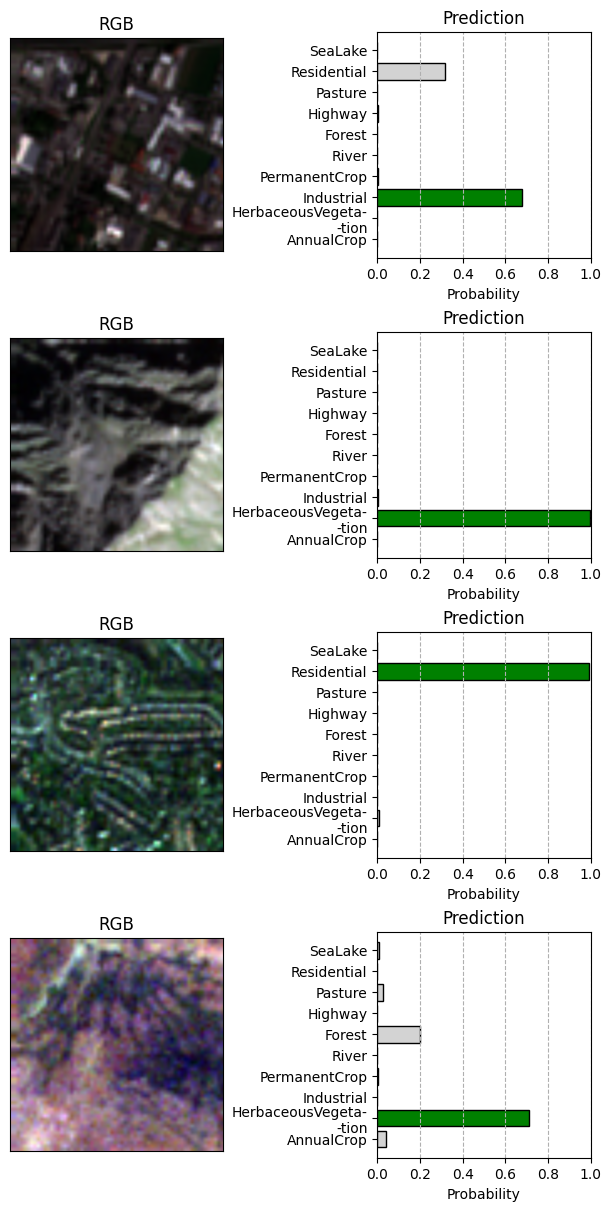

2023-09-28 00:37:03:rastervision.pytorch_learner.learner: INFO - Sample predictions written to ./eurosat_ms/train/valid_preds.png.


In [17]:
learner.plot_predictions(split='valid', batch_limit=4, show=True)

In [18]:
learner.save_model_bundle(export_onnx=False)

2023-09-28 00:37:18:rastervision.pytorch_learner.learner: INFO - Creating bundle.
2023-09-28 00:37:18:rastervision.pytorch_learner.learner: INFO - Saving bundle to ./eurosat_ms/train/model-bundle.zip.


---

# Prediction

In [15]:
learner = ClassificationLearner.from_model_bundle(
    'eurosat_ms/train/model-bundle.zip', 
    output_dir='./eurosat_ms/train/',
    training=False,
)

2023-09-28 00:45:08:rastervision.pytorch_learner.learner: INFO - Loading learner from bundle eurosat_ms/train/model-bundle.zip.
2023-09-28 00:45:08:rastervision.pytorch_learner.learner: INFO - Unzipping model-bundle to /opt/data/tmp/tmpyszs9p25/model-bundle
2023-09-28 00:45:08:rastervision.pytorch_learner.learner: INFO - Loading model weights from: /opt/data/tmp/tmpyszs9p25/model-bundle/model.pth


## Get Sentinel-2 imagery from STAC API as a `DataArray`

In [4]:
from rastervision.core.box import Box
from rastervision.core.data import (
    ChipClassificationLabels, RasterioCRSTransformer, Scene, StatsTransformer, 
    XarraySource)
from rastervision.core.data.utils import (get_polygons_from_uris)
from rastervision.pytorch_learner.dataset import (
    ClassificationSlidingWindowGeoDataset)

from shapely.geometry import mapping
import pystac_client
import stackstac

In [5]:
bbox = Box(ymin=23.5170057, xmin=58.2066668, ymax=23.6448968, xmax=58.6326003)
bbox_geometry = mapping(bbox.to_shapely())
bbox, bbox_geometry

(Box(ymin=23.5170057, xmin=58.2066668, ymax=23.6448968, xmax=58.6326003),
 {'type': 'Polygon',
  'coordinates': (((58.2066668, 23.5170057),
    (58.2066668, 23.6448968),
    (58.6326003, 23.6448968),
    (58.6326003, 23.5170057),
    (58.2066668, 23.5170057)),)})

In [6]:
URL = "https://earth-search.aws.element84.com/v1"
catalog = pystac_client.Client.open(URL)

items = catalog.search(
    intersects=bbox_geometry,
    collections=["sentinel-2-l2a"],
    datetime="2023-09-12/2023-09-12",
    query={"eo:cloud_cover": {"lt": 5}},
).get_all_items()

stack = stackstac.stack(items)
stack

<xarray.DataArray 'stackstac-46cf3c312bac7644bea370464b6de04a' (time: 1,
                                                                band: 32,
                                                                y: 10980,
                                                                x: 10980)>
dask.array<fetch_raster_window, shape=(1, 32, 10980, 10980), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/52)
  * time                                     (time) datetime64[ns] 2023-09-12...
    id                                       (time) <U24 'S2B_40QFM_20230912_...
  * band                                     (band) <U12 'aot' ... 'wvp-jp2'
  * x                                        (x) float64 6e+05 ... 7.098e+05
  * y                                        (y) float64 2.7e+06 ... 2.59e+06
    s2:saturated_defective_pixel_percentage  int64 0
    ...                                       ...
    raster:bands                             (band) object [{'nodata': 0, 'da...
    gsd                                      (band) object None 10 ... None None
    common_name                              (band) object None 'blue' ... None
    center_wavelength                        (band) object None 0.49 ... None
    full_width_half_max                      (band) object None 0.098 ... None
    epsg                                     int64 32640
Attributes:
    spec:        RasterSpec(epsg=32640, bounds=(600000.0, 2590200.0, 709800.0...
    crs:         epsg:32640
    transform:   | 10.00, 0.00, 600000.00|\n| 0.00,-10.00, 2700000.00|\n| 0.0...
    resolution:  10.0

### Convert to a Raster Vision `RasterSource`

In [7]:
crs_transformer = RasterioCRSTransformer(
    transform=stack.transform, image_crs=stack.crs)

In [8]:
data_array = stack
data_array = data_array.isel(time=-1)
data_array = data_array.sel(
    band=[
        'coastal', # B01
        'blue', # B02
        'green', # B03
        'red', # B04
        'rededge1', # B05
        'rededge2', # B06
        'rededge3', # B07
        'nir', # B08
        'nir08', # B8A
        'nir09', # B09
        'swir16', # ???
        'swir16', # B11
        'swir22', # B12
    ])

In [9]:
bbox_pixel_coords = crs_transformer.map_to_pixel(bbox).normalize()

raster_source_unnormalized = XarraySource(
    data_array,
    crs_transformer=crs_transformer,
    bbox=bbox_pixel_coords,
)
stats_tf = StatsTransformer.from_raster_sources([raster_source_unnormalized])

raster_source = XarraySource(
    data_array,
    crs_transformer=crs_transformer,
    raster_transformers=[stats_tf],
    bbox=bbox_pixel_coords,
)
raster_source.shape

Analyzing chips: 0it [00:00, ?it/s]

(1459, 4333, 13)

Visualize the full image (within the city's bounding box):

In [ ]:
_ = data_array.load()

In [10]:
aoi_polygons = get_polygons_from_uris('aoi_Muscat.json', crs_transformer)
scene = Scene(
    id='test_scene',
    raster_source=raster_source,
    aoi_polygons=aoi_polygons,
)

In [11]:
pred_ds = ClassificationSlidingWindowGeoDataset(
    scene=scene, 
    size=64, 
    stride=64, 
    transform=A.Resize(256, 256),
)
len(pred_ds)

1564

In [16]:
predictions = learner.predict_dataset(
    pred_ds,
    raw_out=True,
    numpy_out=True,
    progress_bar=True,
    dataloader_kw=dict(num_workers=0),
)
labels = ChipClassificationLabels.from_predictions(pred_ds.windows, predictions)

Predicting:   0%|          | 0/1564 [00:00<?, ?it/s]

In [19]:
labels.save(
    'eurosat_ms/predict/muscat.json', 
    class_config, 
    crs_transformer, 
    bbox=raster_source.bbox)

In [45]:
arr = raster_source[:, :]
arr.shape

(1459, 4333, 3)

In [48]:
from rastervision.core.data.utils import write_bbox
import pyproj

In [59]:
bbox, crs_transformer.pixel_to_map(raster_source.bbox)

(Box(ymin=23.5170057, xmin=58.2066668, ymax=23.6448968, xmax=58.6326003),
 Box(ymin=23.648794076348786, xmin=58.20790834069194, ymax=23.513168486467464, xmax=58.631007085025566))

In [ ]:
write_bbox(
    'muscat_rgb.tif', 
    arr, 
    bbox=crs_transformer.pixel_to_map(raster_source.bbox).normalize(), 
    crs_wkt=pyproj.CRS('epsg:4326').to_wkt(),
)